In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset oficial disponível no site do ministério da saúde

df = pd.read_excel('/mnt/c/Users/felipe/Downloads/HIST_PAINEL_COVIDBR_20200513.xlsx')
df = df[df['municipio'] == 'São Paulo']
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
56571,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-03-28,13,12252023.0,1149,76,NaN,NaN
56572,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-03-29,14,12252023.0,1183,89,NaN,NaN
56573,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-03-30,14,12252023.0,1233,103,NaN,NaN
56574,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-03-31,14,12252023.0,1885,121,NaN,NaN
56575,Sudeste,SP,São Paulo,35,355030.0,35016.0,São Paulo,2020-04-01,14,12252023.0,2418,144,NaN,NaN


In [3]:
filtered = df.filter(items=['data', 'semanaEpi', 'populacaoTCU2019', 
                            'casosAcumulado', 'obitosAcumulado'])

filtered['casosNovos'] = df['casosAcumulado'].diff()
filtered['obitosNovos'] = df['obitosAcumulado'].diff()
filtered.head()

,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,casosNovos,obitosNovos
56571,2020-03-28,13,12252023.0,1149,76,NaN,NaN
56572,2020-03-29,14,12252023.0,1183,89,34.0,13.0
56573,2020-03-30,14,12252023.0,1233,103,50.0,14.0
56574,2020-03-31,14,12252023.0,1885,121,652.0,18.0
56575,2020-04-01,14,12252023.0,2418,144,533.0,23.0


In [5]:
# Dataset formado por dados divulgados pelas secretarias de saúde, disponível no BrasilIO

df_2 = pd.read_csv('/mnt/c/Users/felipe/Downloads/caso_full.csv')
df_2 = df_2[df_2['city'] == 'São Paulo']
df_2.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0,0,4,city,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0,0,5,city,SP,0,0


In [6]:
filtered_2 = df_2.filter(items=['city', 'date', 'epidemiological_week', 'last_available_confirmed',
                                'new_confirmed', 'last_available_deaths', 'new_deaths'])

filtered_2_0 = filtered_2[filtered_2['date'] <= '2020-03-27']
filtered_2_0.head()

,city,date,epidemiological_week,last_available_confirmed,new_confirmed,last_available_deaths,new_deaths
0,São Paulo,2020-02-25,9,1,1,0,0
2,São Paulo,2020-02-26,9,1,0,0,0
4,São Paulo,2020-02-27,9,1,0,0,0
6,São Paulo,2020-02-28,9,2,1,0,0
8,São Paulo,2020-02-29,9,2,0,0,0


In [7]:
#Dataset baseado nos dados divulgados pela secretária de saúde de Sp, disponibilizado pela SEADE
df_3 = pd.read_csv('/mnt/c/Users/felipe/Downloads/dados_covid_sp.csv', delimiter=';')
df_3 = df_3[df_3['munic'] == 'sao paulo']
df_3.head()

,munic,casos,obitos,dia,mes,codigo_ibge,latitude,longitude
27,sao paulo,899.0,54.0,26,3,3550308.0,-23.5329,-46.6395
67,sao paulo,1044.0,63.0,27,3,3550308.0,-23.5329,-46.6395
116,sao paulo,1149.0,76.0,28,3,3550308.0,-23.5329,-46.6395
167,sao paulo,1183.0,89.0,29,3,3550308.0,-23.5329,-46.6395
219,sao paulo,1233.0,103.0,30,3,3550308.0,-23.5329,-46.6395


In [8]:
new_df_columns = ['epidemiological_week', 'date', 'confirmed_cases', 'new_cases', 'deaths', 'new_deaths']

new_df_1 = pd.DataFrame({new_df_columns[0]:filtered_2_0['epidemiological_week'],
                      new_df_columns[1]:filtered_2_0['date'],
                       new_df_columns[2]:filtered_2_0['last_available_confirmed'],
                       new_df_columns[3]:filtered_2_0['new_confirmed'],
                       new_df_columns[4]:filtered_2_0['last_available_deaths'],
                       new_df_columns[5]:filtered_2_0['new_deaths']
                      })

new_df_2 = pd.DataFrame({new_df_columns[0]:filtered['semanaEpi'],
                      new_df_columns[1]:filtered['data'],
                       new_df_columns[2]:filtered['casosAcumulado'],
                       new_df_columns[3]:filtered['casosNovos'],
                       new_df_columns[4]:filtered['obitosAcumulado'],
                       new_df_columns[5]:filtered['obitosNovos']
                      })

frames = [new_df_1, new_df_2]
new_df = pd.concat(frames)

new_df = new_df.reset_index().drop(columns='index')

new_df['new_cases'][32] = new_df['confirmed_cases'][32] - new_df['confirmed_cases'][31]
new_df['new_deaths'][32] = new_df['deaths'][32] - new_df['deaths'][31]

/home/felipe/.miniconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/felipe/.miniconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
new_df.to_csv('sp_data_2020_05_13.csv', index_label=False)

In [10]:
new_df = pd.read_csv('sp_data_2020_05_13.csv')
new_df

,epidemiological_week,date,confirmed_cases,new_cases,deaths,new_deaths
0,9,2020-02-25,1,1.0,0,0.0
1,9,2020-02-26,1,0.0,0,0.0
2,9,2020-02-27,1,0.0,0,0.0
3,9,2020-02-28,2,1.0,0,0.0
4,9,2020-02-29,2,0.0,0,0.0
...,...,...,...,...,...,...
74,19,2020-05-09,26787,1421.0,2223,113.0
75,20,2020-05-10,27307,520.0,2266,43.0
76,20,2020-05-11,27771,464.0,2283,17.0
77,20,2020-05-12,28682,911.0,2407,124.0


In [2]:
df = pd.read_csv('sp_data_2020_05_13.csv')

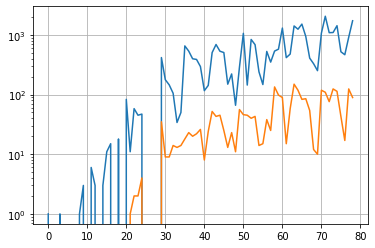

In [3]:
plt.semilogy(df[['new_cases','new_deaths']])
plt.grid(True)

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,epidemiological_week,date,confirmed_cases,new_cases,deaths,new_deaths
0,9,2020-02-25,1,1.0,0,0.0
1,9,2020-02-26,1,0.0,0,0.0
2,9,2020-02-27,1,0.0,0,0.0
3,9,2020-02-28,2,1.0,0,0.0
4,9,2020-02-29,2,0.0,0,0.0
5,10,2020-03-01,2,0.0,0,0.0
6,10,2020-03-02,2,0.0,0,0.0
7,10,2020-03-03,2,0.0,0,0.0
8,10,2020-03-04,3,1.0,0,0.0
9,10,2020-03-05,6,3.0,0,0.0
